In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [6]:
data = pd.read_csv("logcircular.txt", sep="\t", header=None, names=["timestamp", "x", "y", "theta", "v", "w"])

data["nanosecs"] = data.apply(lambda row: re.match("(?:builtin_interfaces\.msg\.Time\(sec=\d+, nanosec=)(\d+)(?:\))", row.timestamp).group(1), axis=1)
data["secs"] = data.apply(lambda row: re.match("(?:builtin_interfaces\.msg\.Time\(sec=)(\d+)(?:, nanosec=\d+\))", row.timestamp).group(1), axis=1)

data["g_timestamp"] = data.apply(lambda row: np.float64(row.secs) + np.float64(row.nanosecs) * 10e-10, axis=1)

data

,timestamp,x,y,theta,v,w,nanosecs,secs,g_timestamp
0,"builtin_interfaces.msg.Time(sec=1694724337, na...",0.171383,-0.565055,0.420715,0.485085,0.984772,916671708,1694724337,1.694724e+09
1,"builtin_interfaces.msg.Time(sec=1694724337, na...",0.186742,-0.557903,0.454345,0.475673,0.999336,964254478,1694724337,1.694724e+09
2,"builtin_interfaces.msg.Time(sec=1694724338, na...",0.201858,-0.550234,0.487870,0.510900,0.967641,3848045,1694724338,1.694724e+09
3,"builtin_interfaces.msg.Time(sec=1694724338, na...",0.216713,-0.542029,0.520354,0.534235,0.893789,39411596,1694724338,1.694724e+09
4,"builtin_interfaces.msg.Time(sec=1694724338, na...",0.231238,-0.533388,0.553185,0.529685,0.914155,66254725,1694724338,1.694724e+09
...,...,...,...,...,...,...,...,...,...
512,"builtin_interfaces.msg.Time(sec=1694724359, na...",-0.501934,-0.294298,-1.227441,0.461074,1.008316,129425161,1694724359,1.694724e+09
513,"builtin_interfaces.msg.Time(sec=1694724359, na...",-0.496113,-0.309722,-1.190213,0.431479,1.108468,161302069,1694724359,1.694724e+09
514,"builtin_interfaces.msg.Time(sec=1694724359, na...",-0.489623,-0.325201,-1.155497,0.441241,1.035600,196369573,1694724359,1.694724e+09
515,"builtin_interfaces.msg.Time(sec=1694724359, na...",-0.482550,-0.340576,-1.121748,0.457499,1.014760,238357137,1694724359,1.694724e+09


Seleccion de puntos (por tiempo)

In [7]:
selectedRow0 = data.iloc[len(data)//5]
selectedRow1 = data.iloc[len(data)//2]
selectedRow2 = data.iloc[len(data)//5*4]

print(selectedRow0)
print(selectedRow1)
print(selectedRow2)

timestamp      builtin_interfaces.msg.Time(sec=1694724342, na...
x                                                      -0.367603
y                                                       0.250665
theta                                                  -2.410666
v                                                       0.536591
w                                                        0.85037
nanosecs                                               118146342
secs                                                  1694724342
g_timestamp                                    1694724342.118146
Name: 103, dtype: object
timestamp      builtin_interfaces.msg.Time(sec=1694724348, na...
x                                                       0.152032
y                                                       0.361128
theta                                                     2.8078
v                                                       0.508346
w                                                       0.968973


## a)

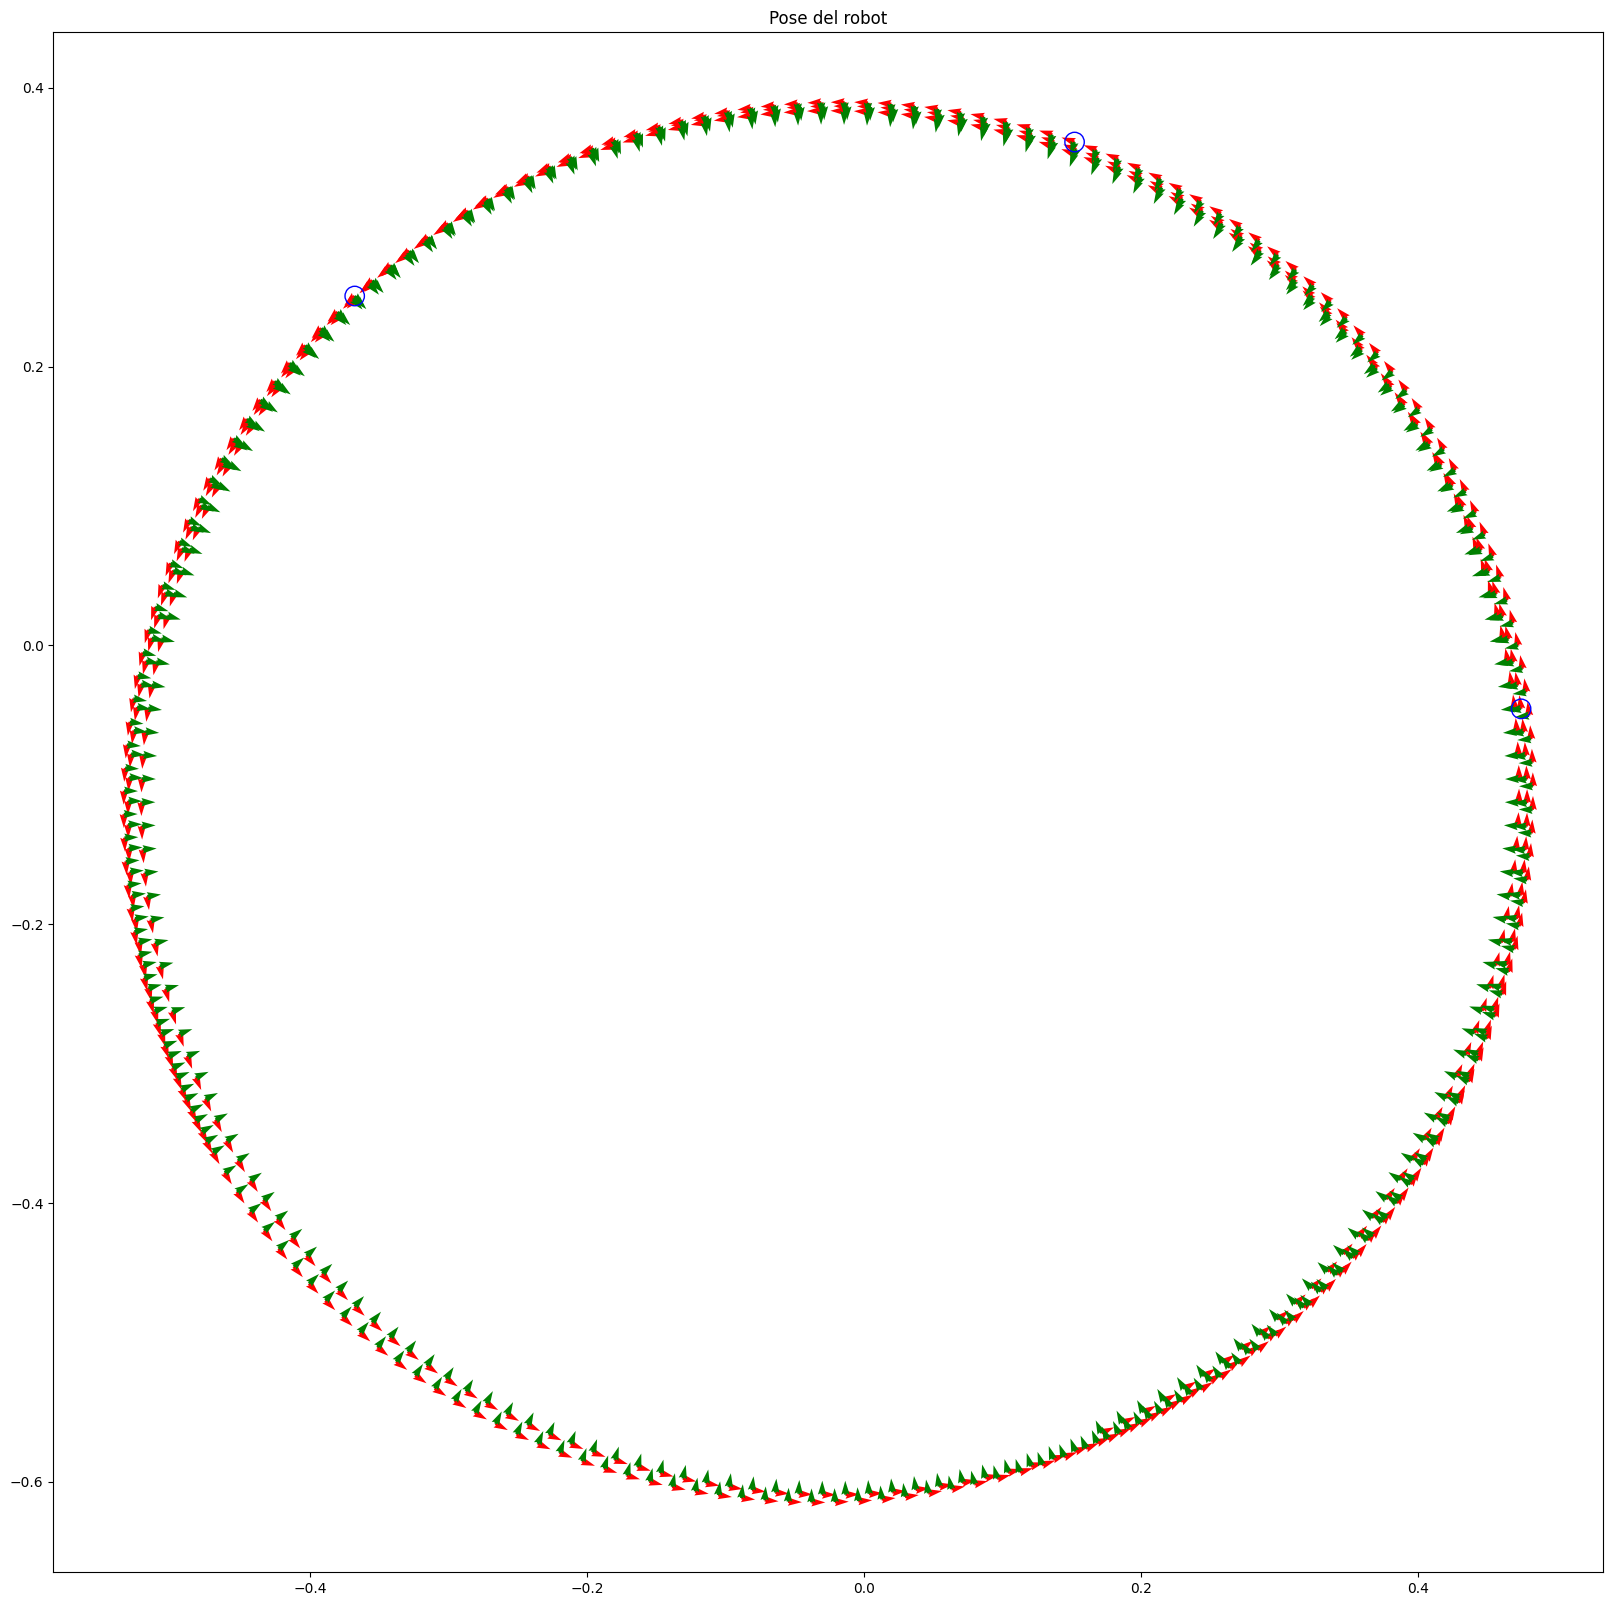

In [8]:
plt.rcParams["figure.figsize"] = (20,20)

plt.quiver(data.x, data.y, np.cos(data.theta), np.sin(data.theta), color='r', units='xy', scale=100, linewidths=0.1)
plt.quiver(data.x, data.y, -np.sin(data.theta), np.cos(data.theta), color='g', units='xy', scale=100, linewidths=0.1)

plt.gca().add_patch(plt.Circle((selectedRow0.x, selectedRow0.y), 0.007, color='b', fill=False))
plt.gca().add_patch(plt.Circle((selectedRow1.x, selectedRow1.y), 0.007, color='b', fill=False))
plt.gca().add_patch(plt.Circle((selectedRow2.x, selectedRow2.y), 0.007, color='b', fill=False))

plt.title("Pose del robot")
plt.savefig("a", dpi=300)
plt.show()

plt.rcParams["figure.figsize"] = (6.4, 4.8)

## b)

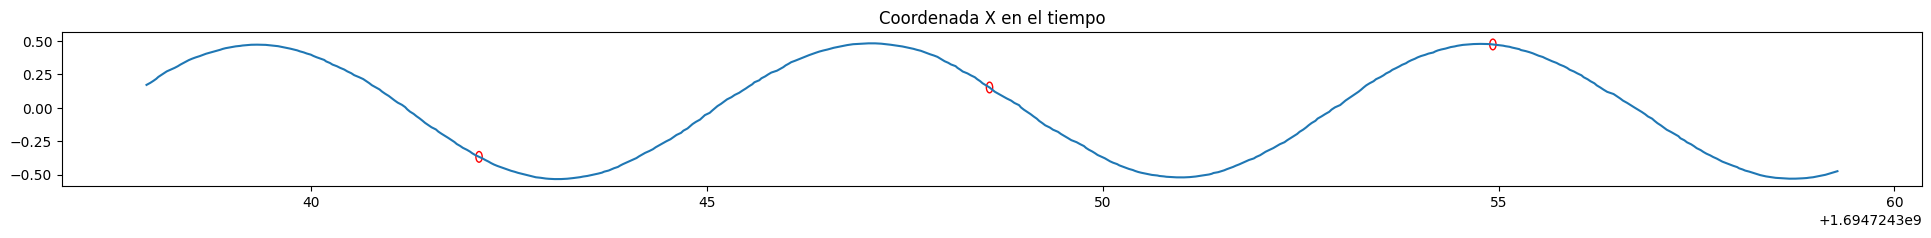

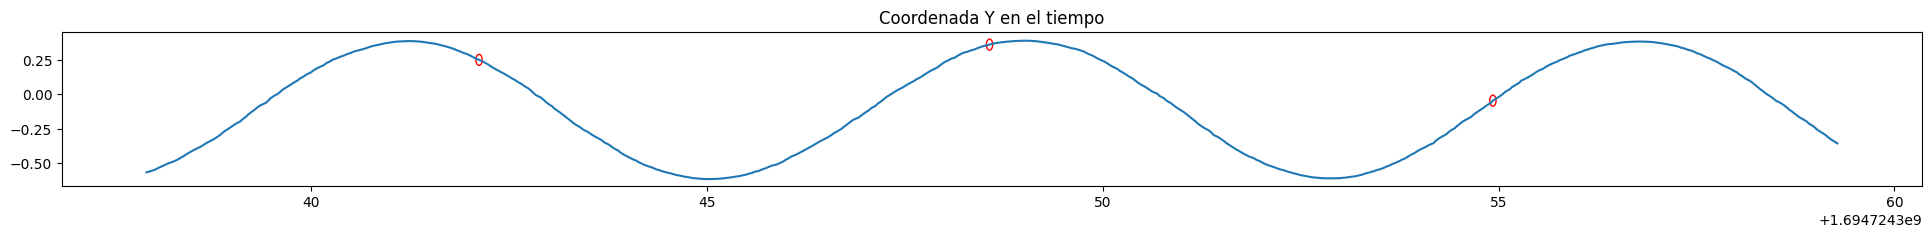

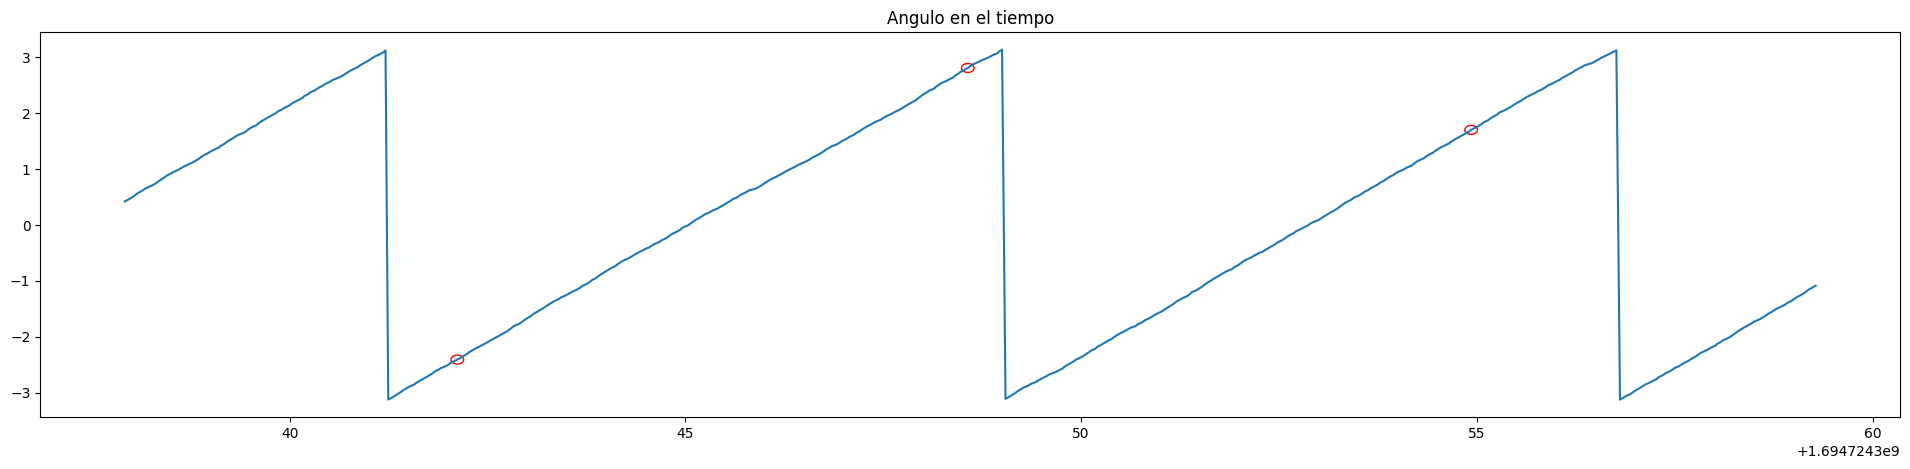

In [9]:
plt.rcParams["figure.figsize"] = (24, 2)

plt.plot(data.g_timestamp, data.x)
plt.gca().add_patch(plt.Circle((selectedRow0.g_timestamp, selectedRow0.x), 0.04, color='r', fill=False))
plt.gca().add_patch(plt.Circle((selectedRow1.g_timestamp, selectedRow1.x), 0.04, color='r', fill=False))
plt.gca().add_patch(plt.Circle((selectedRow2.g_timestamp, selectedRow2.x), 0.04, color='r', fill=False))
plt.title("Coordenada X en el tiempo")
plt.savefig("b1", dpi=300)
plt.show()

plt.plot(data.g_timestamp, data.y)
plt.gca().add_patch(plt.Circle((selectedRow0.g_timestamp, selectedRow0.y), 0.04, color='r', fill=False))
plt.gca().add_patch(plt.Circle((selectedRow1.g_timestamp, selectedRow1.y), 0.04, color='r', fill=False))
plt.gca().add_patch(plt.Circle((selectedRow2.g_timestamp, selectedRow2.y), 0.04, color='r', fill=False))
plt.title("Coordenada Y en el tiempo")
plt.savefig("b2", dpi=300)
plt.show()

plt.rcParams["figure.figsize"] = (24, 5)

plt.plot(data.g_timestamp, data.theta)
plt.gca().add_patch(plt.Circle((selectedRow0.g_timestamp, selectedRow0.theta), 0.08, color='r', fill=False))
plt.gca().add_patch(plt.Circle((selectedRow1.g_timestamp, selectedRow1.theta), 0.08, color='r', fill=False))
plt.gca().add_patch(plt.Circle((selectedRow2.g_timestamp, selectedRow2.theta), 0.08, color='r', fill=False))
plt.title("Angulo en el tiempo")
plt.savefig("b3", dpi=300)
plt.show()

plt.rcParams["figure.figsize"] = (6.4, 4.8)

In [10]:
del data

## c)

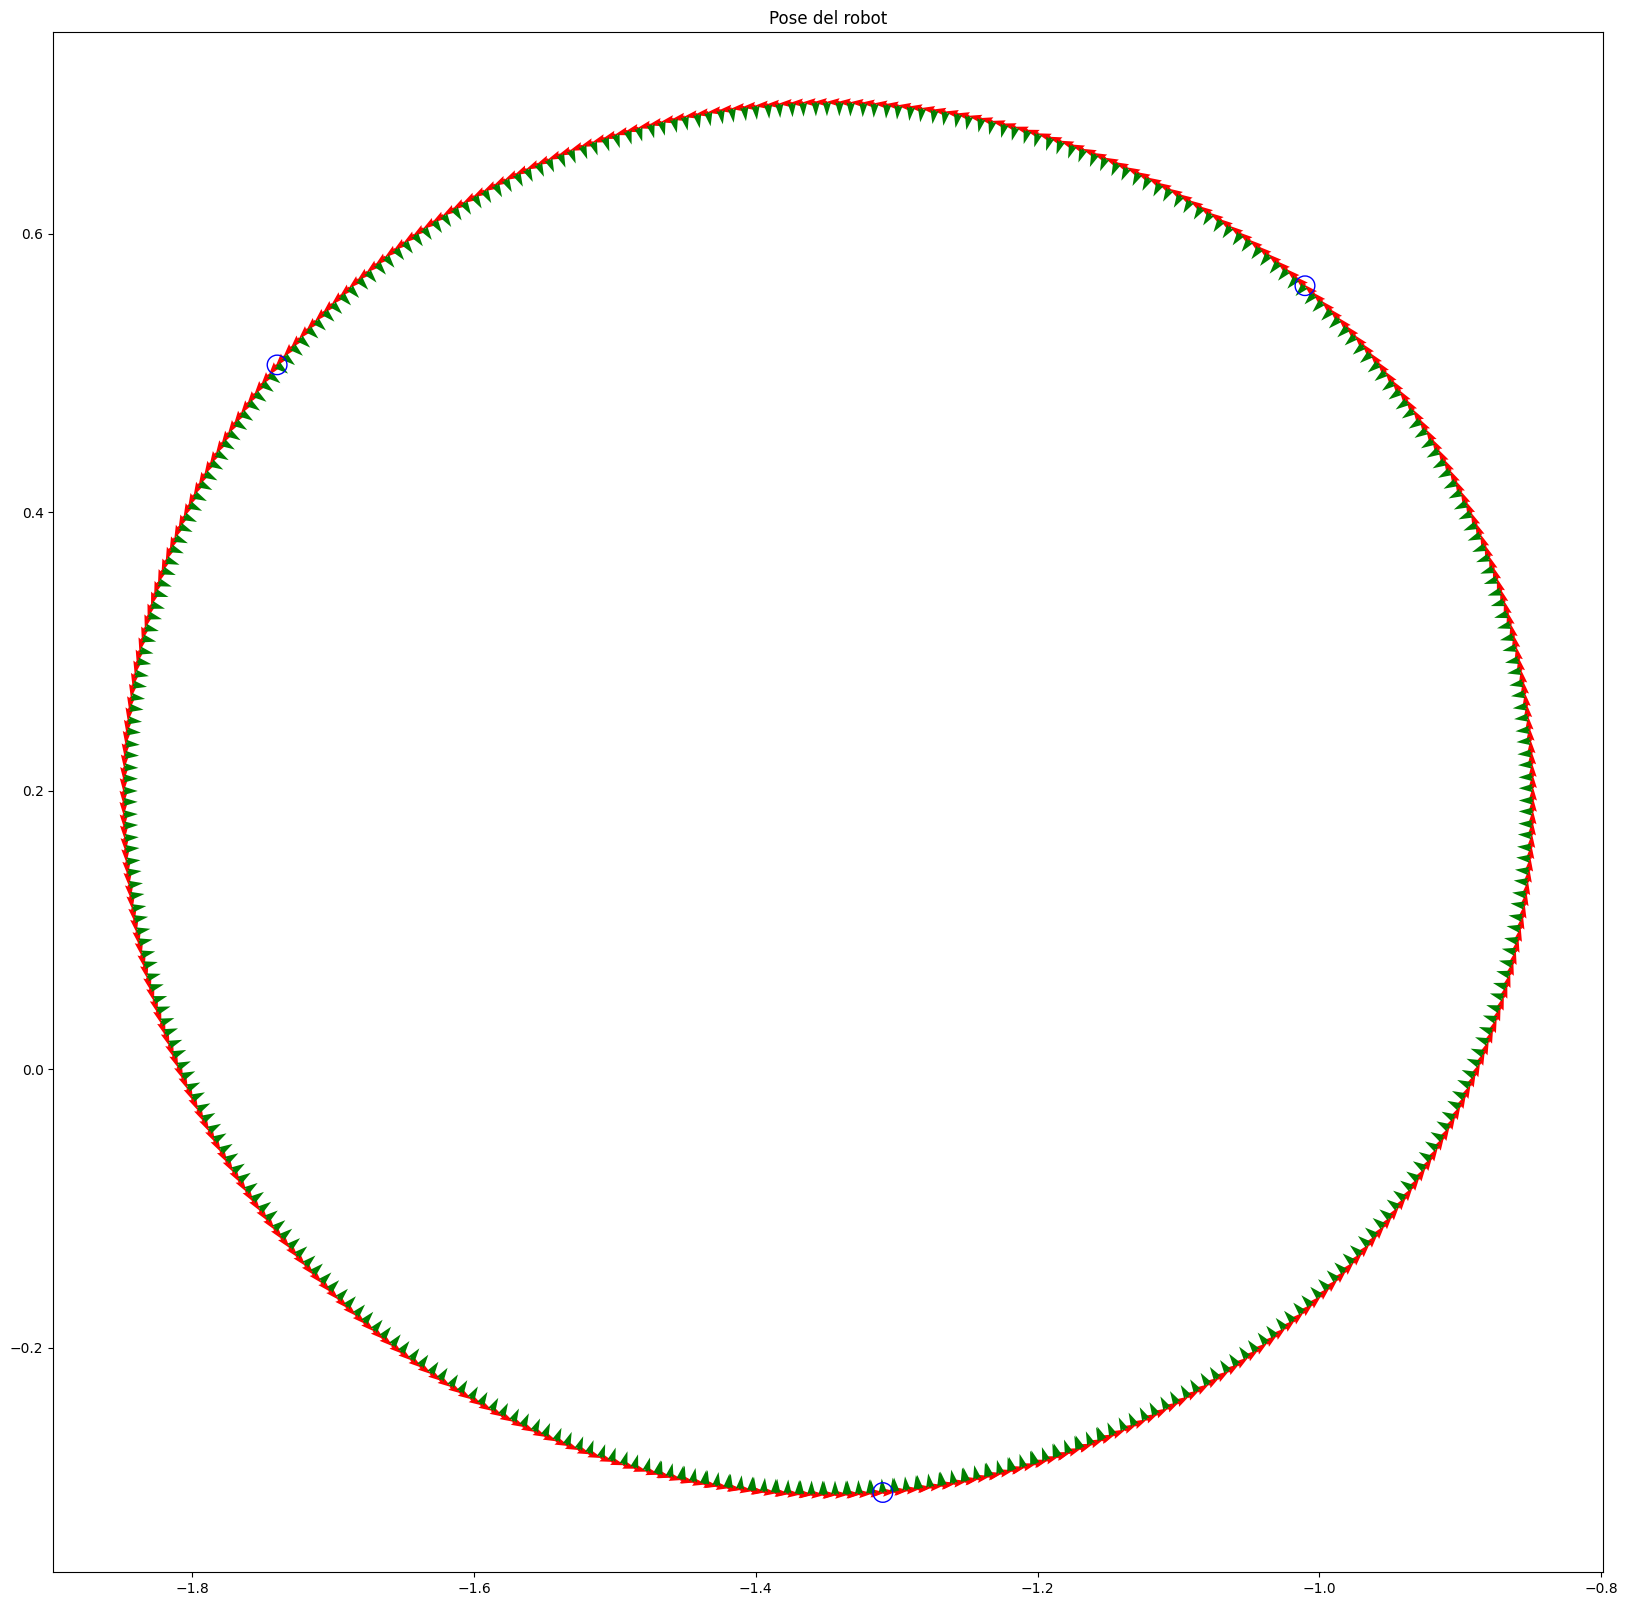

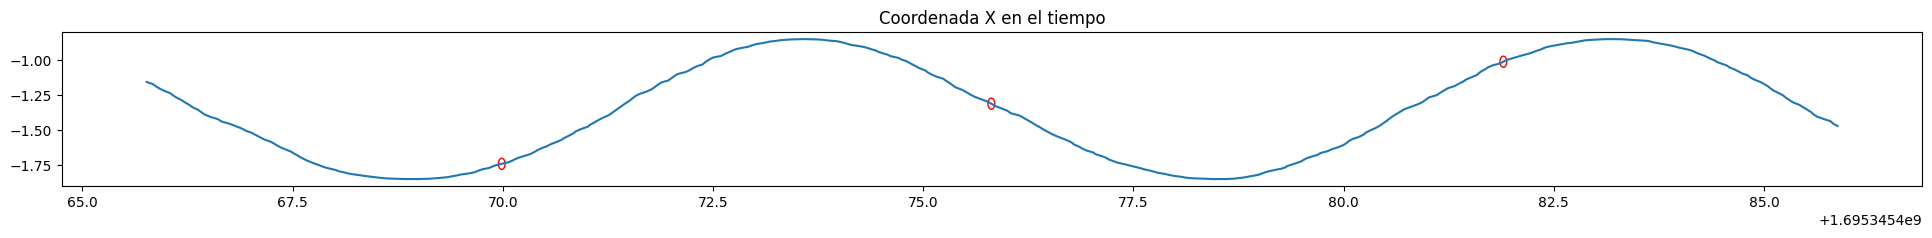

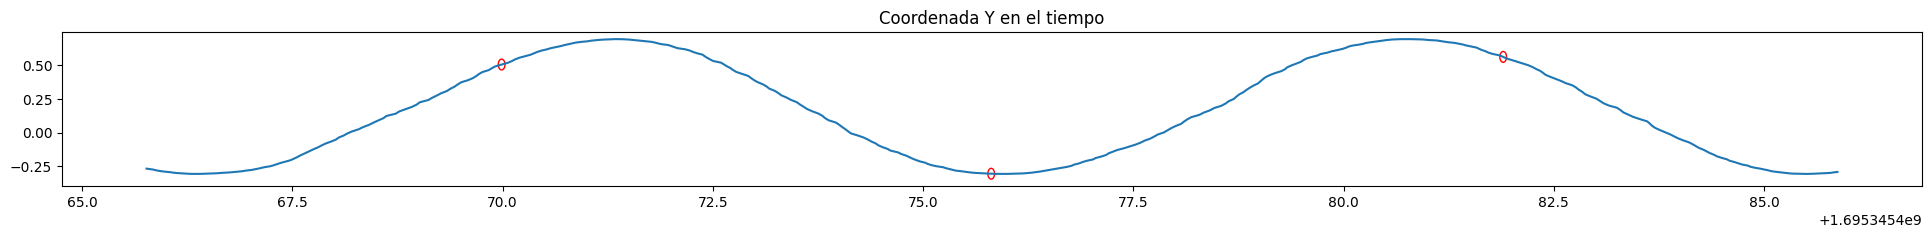

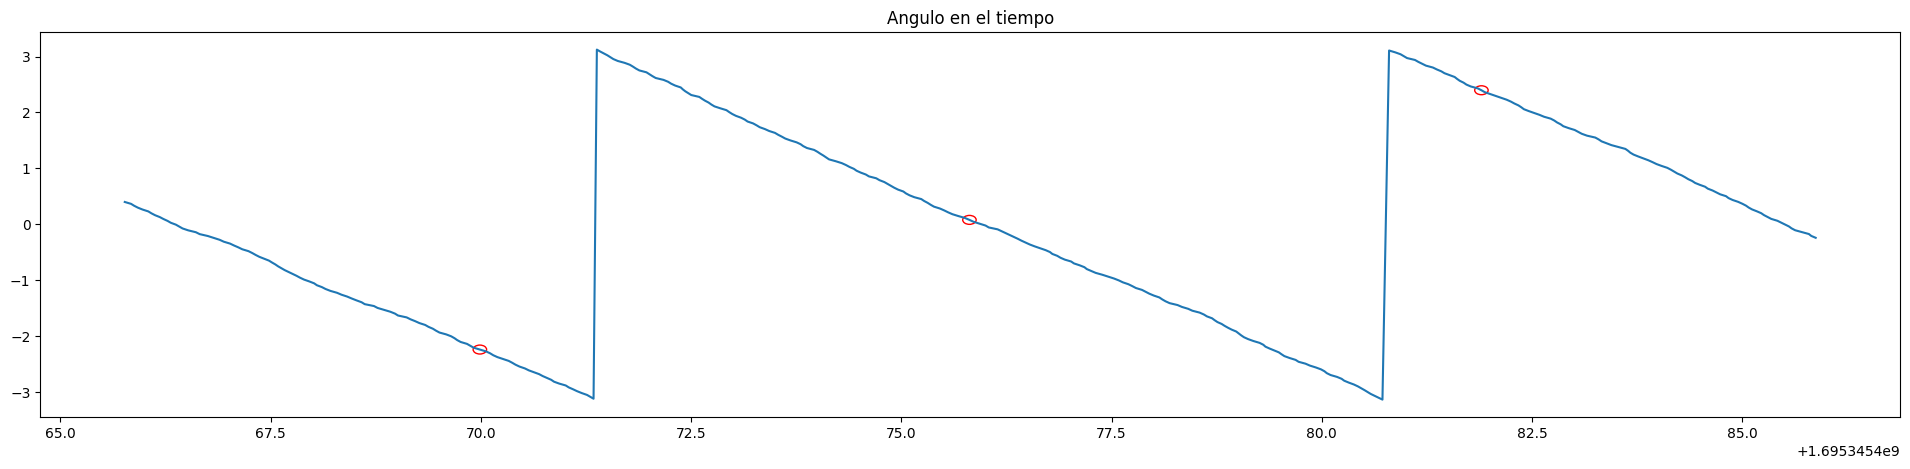

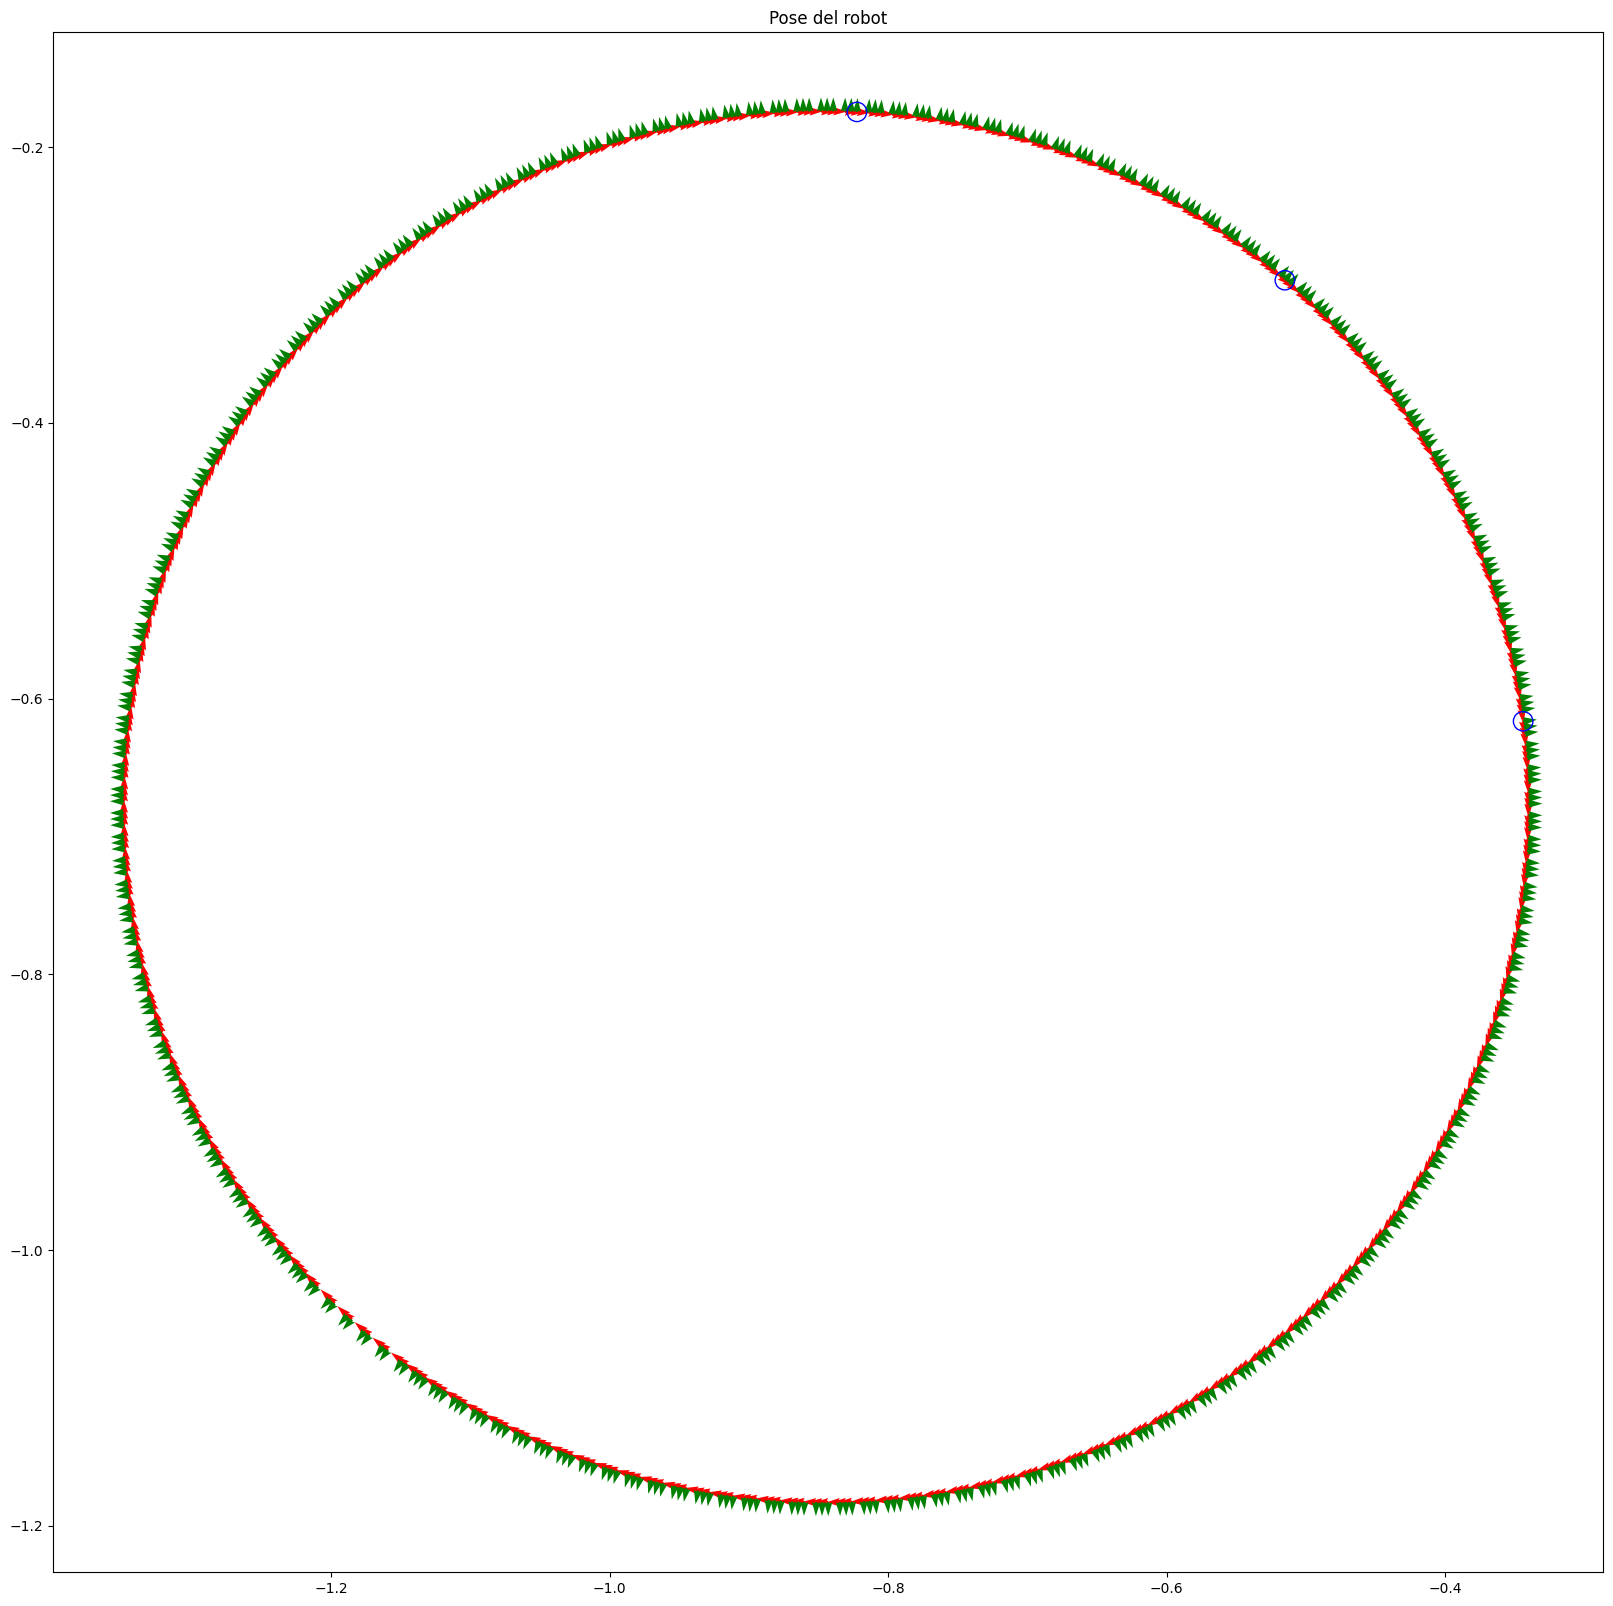

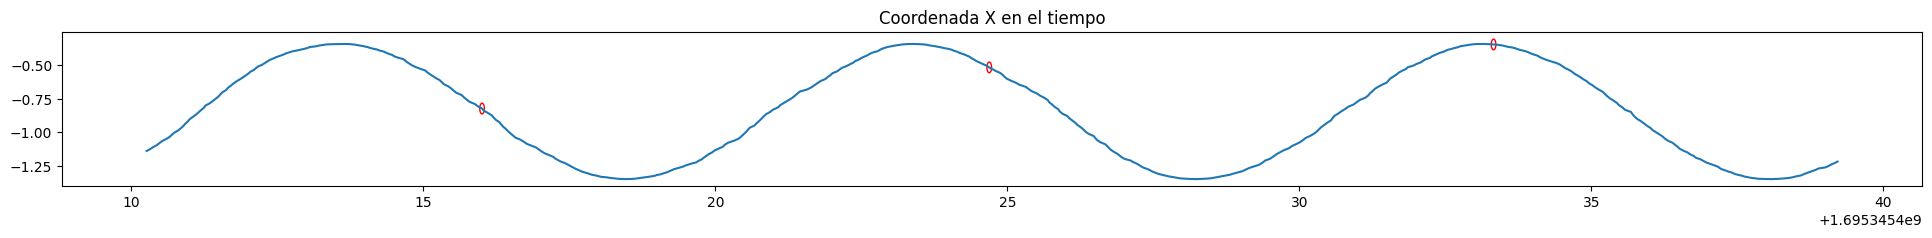

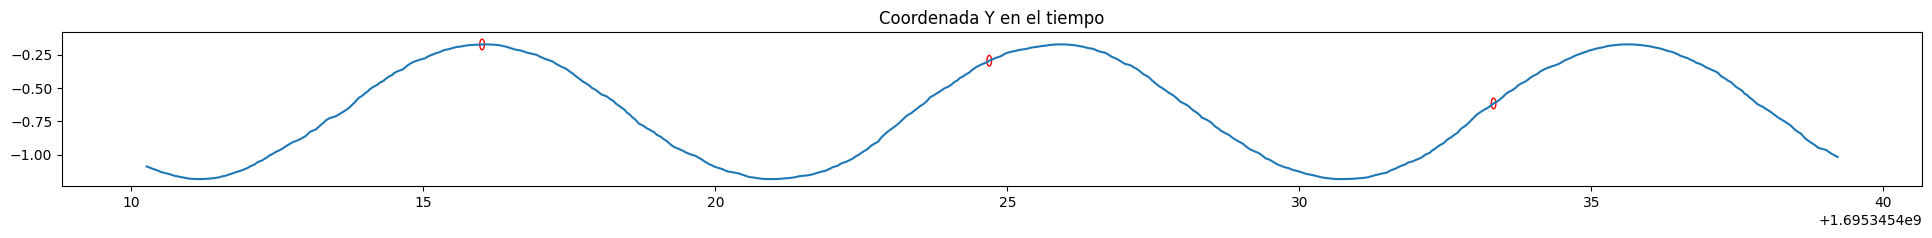

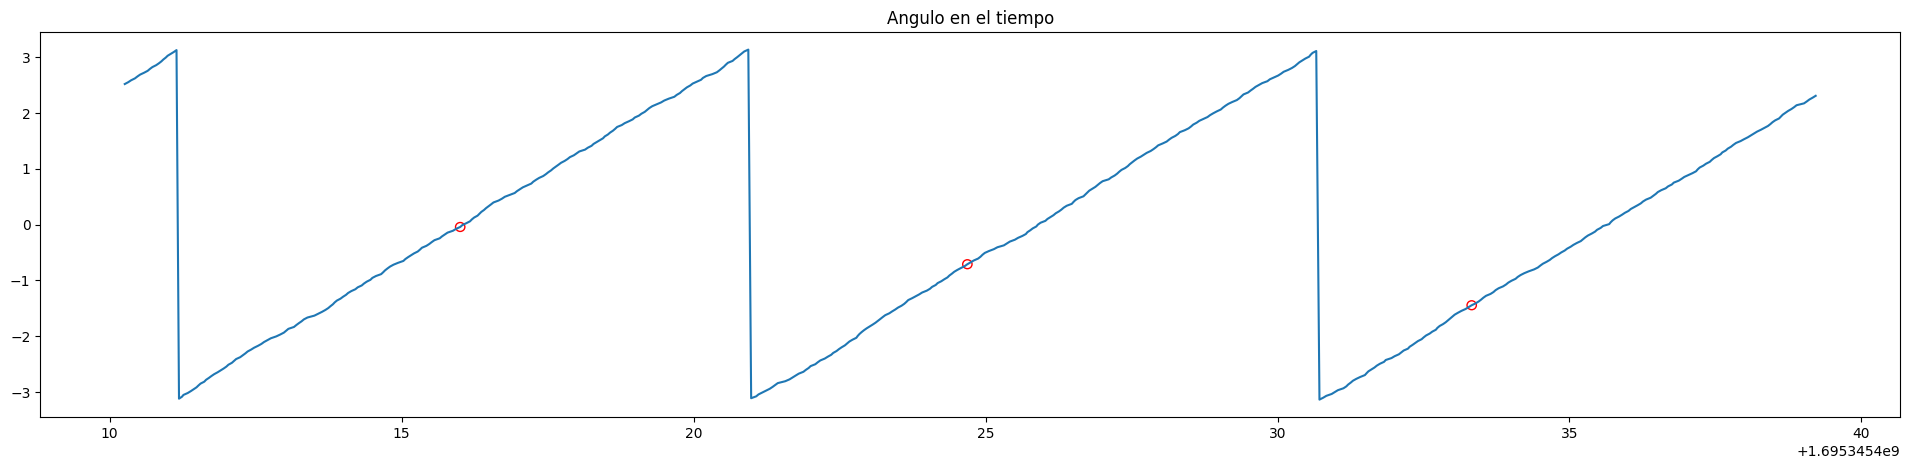

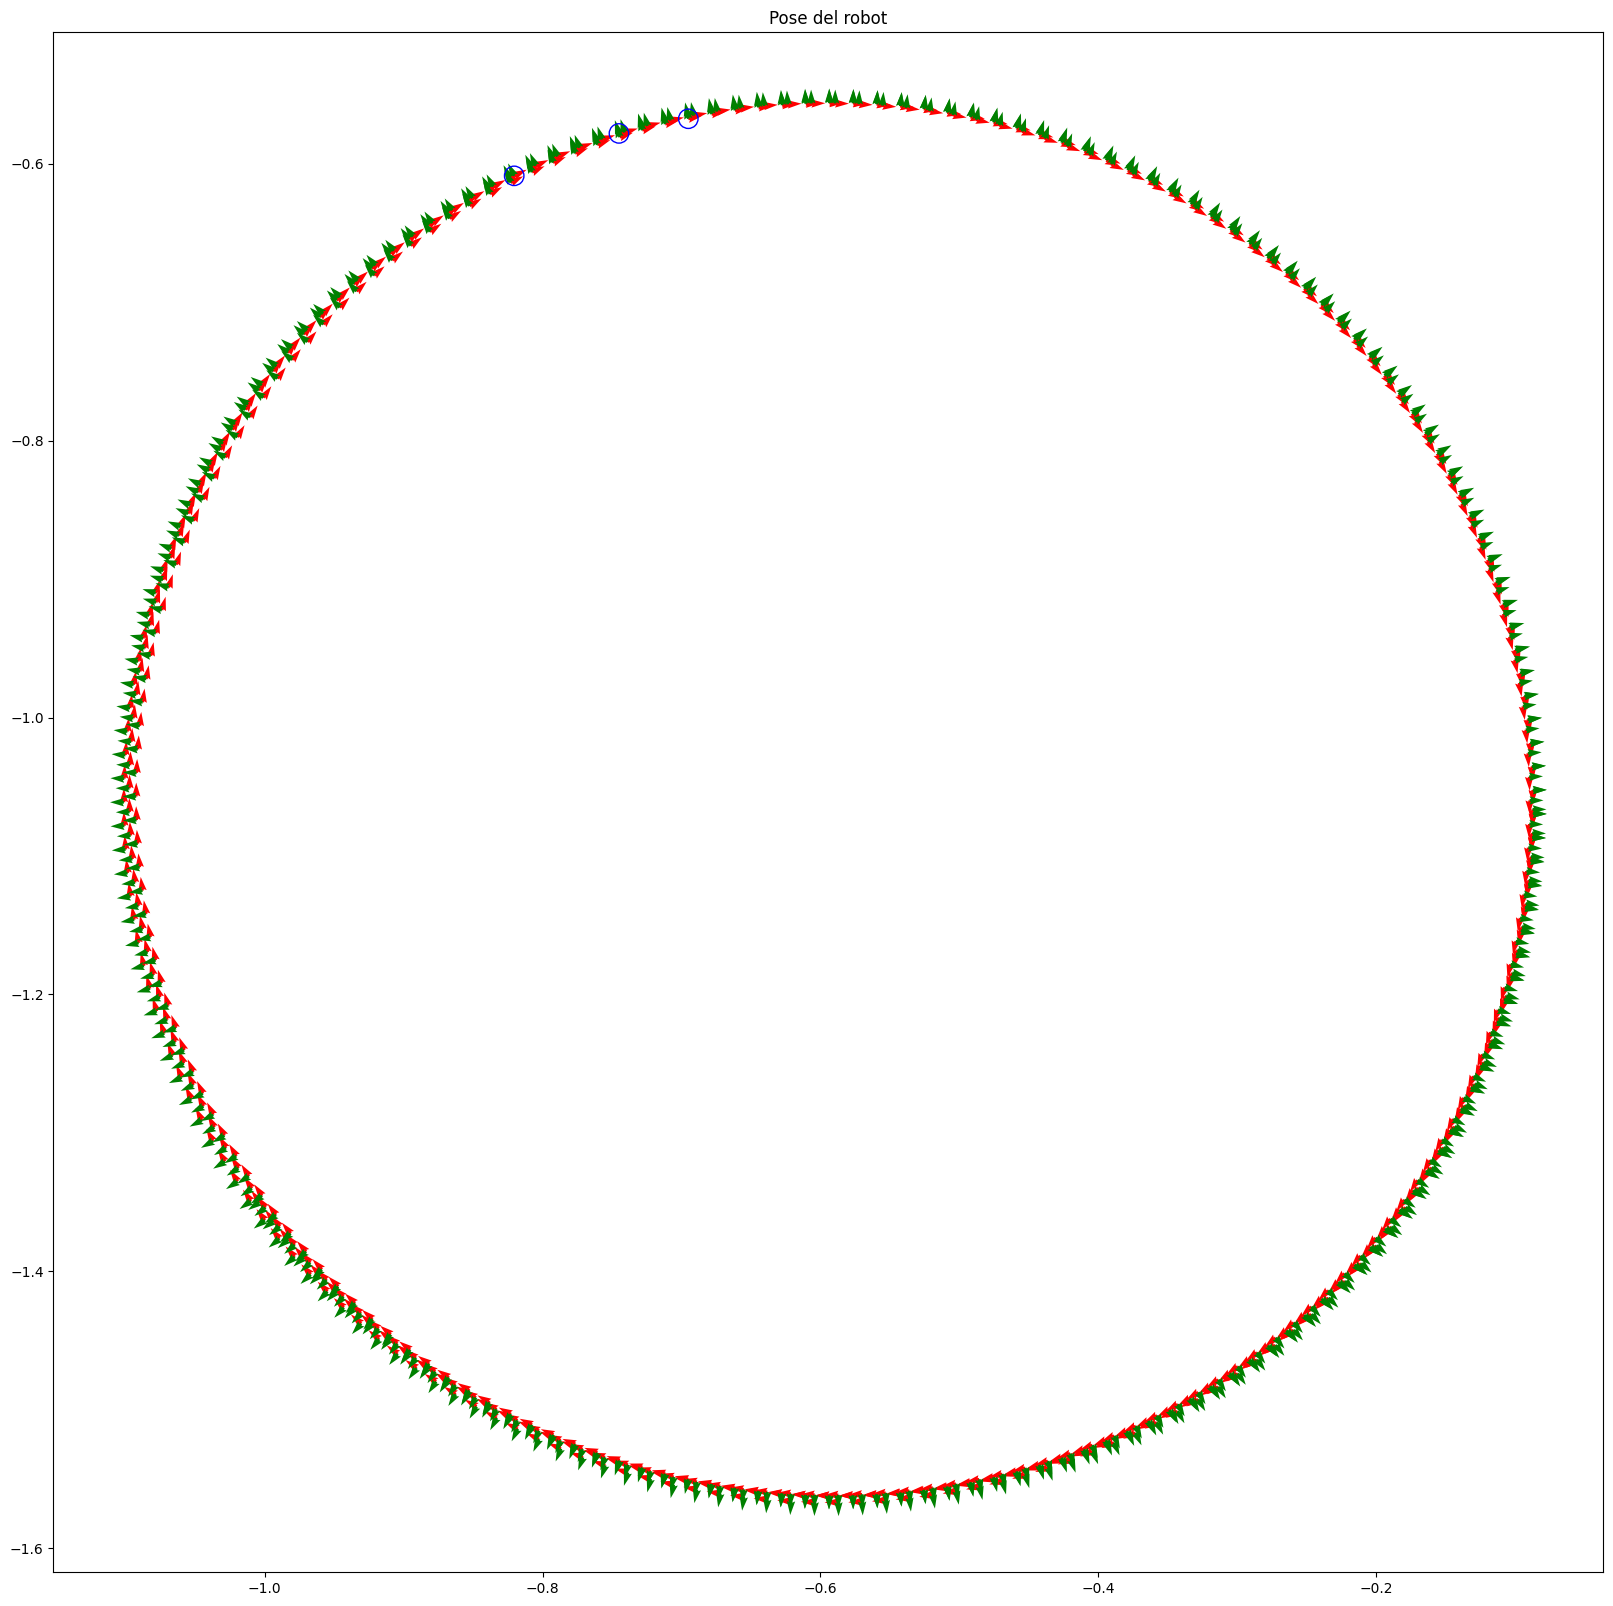

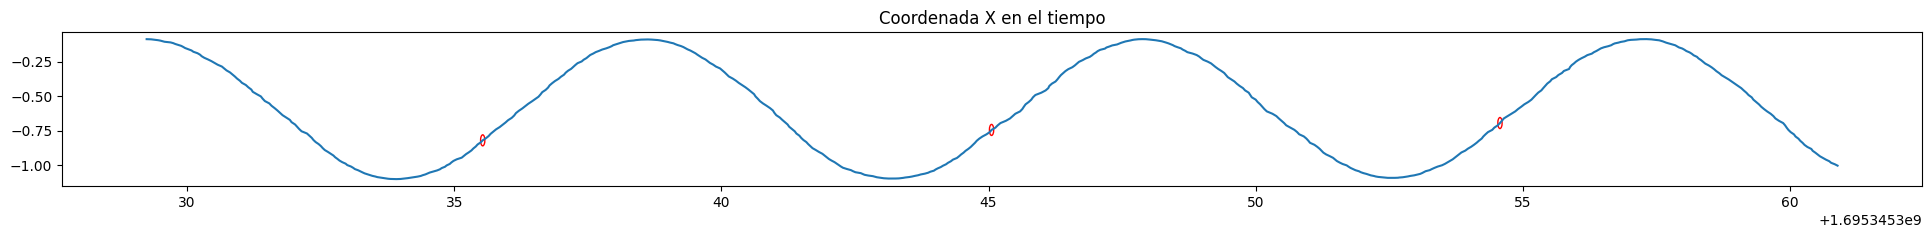

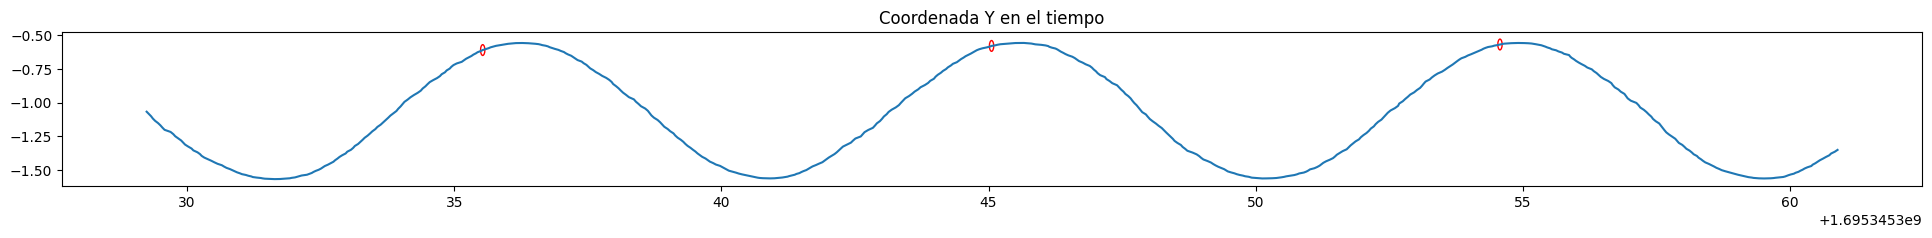

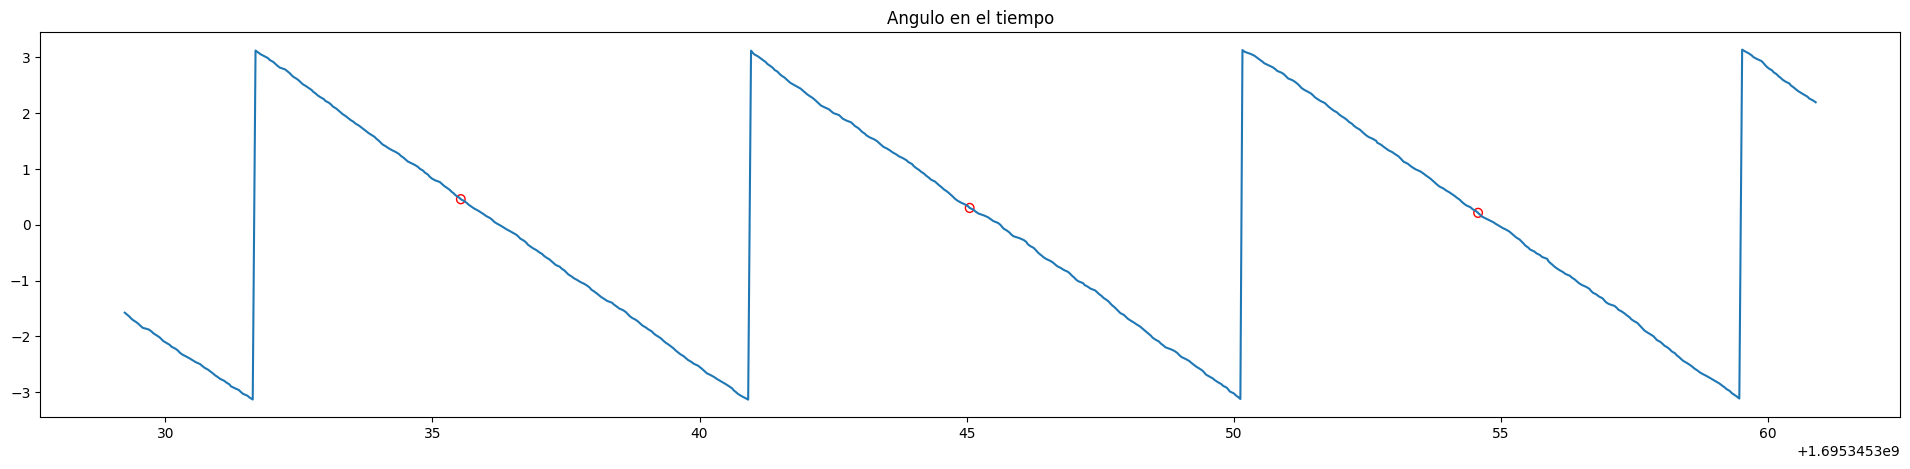

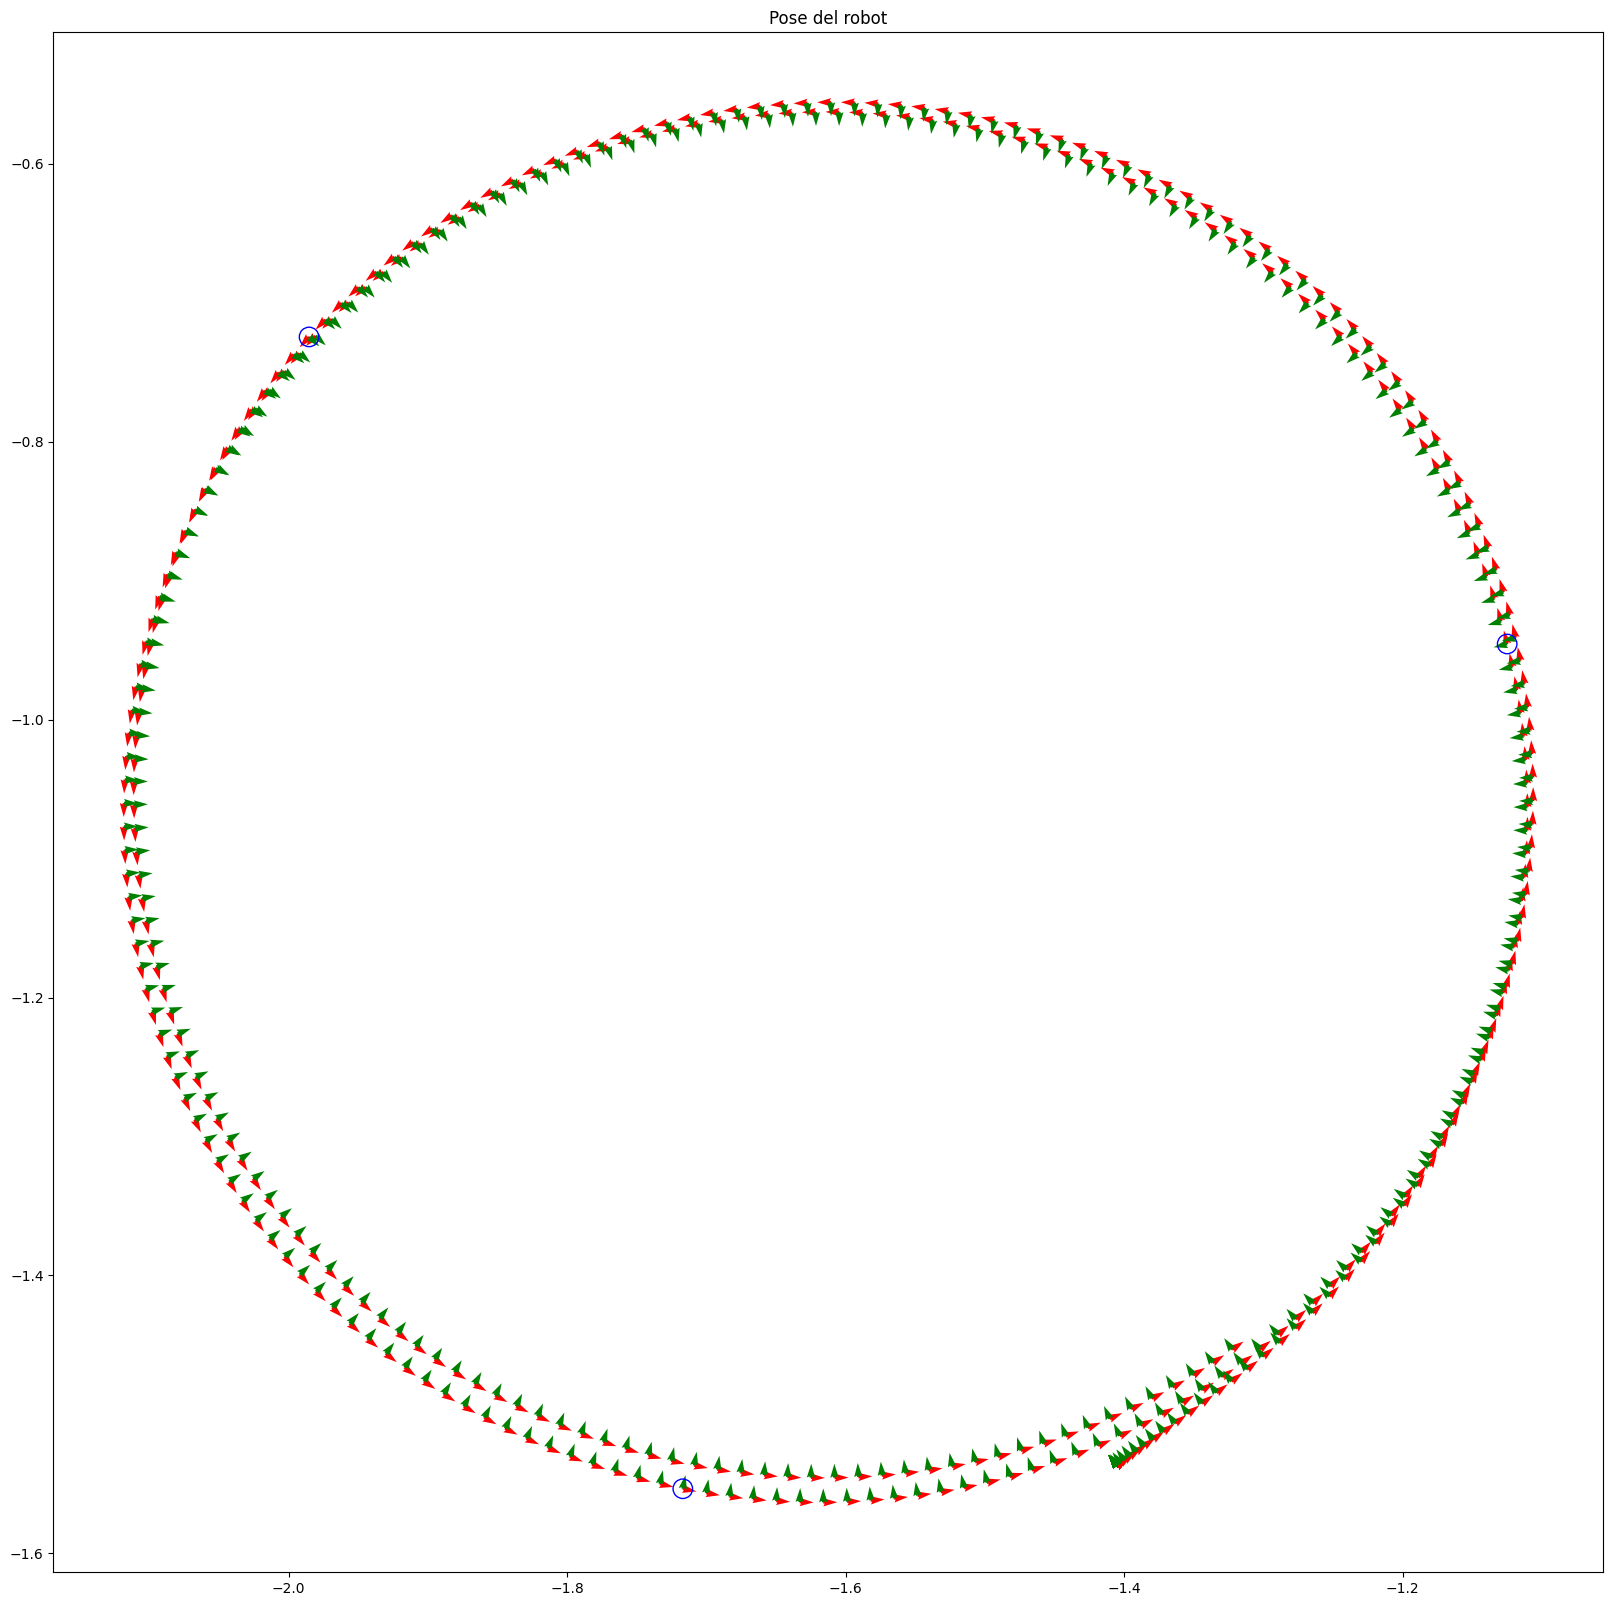

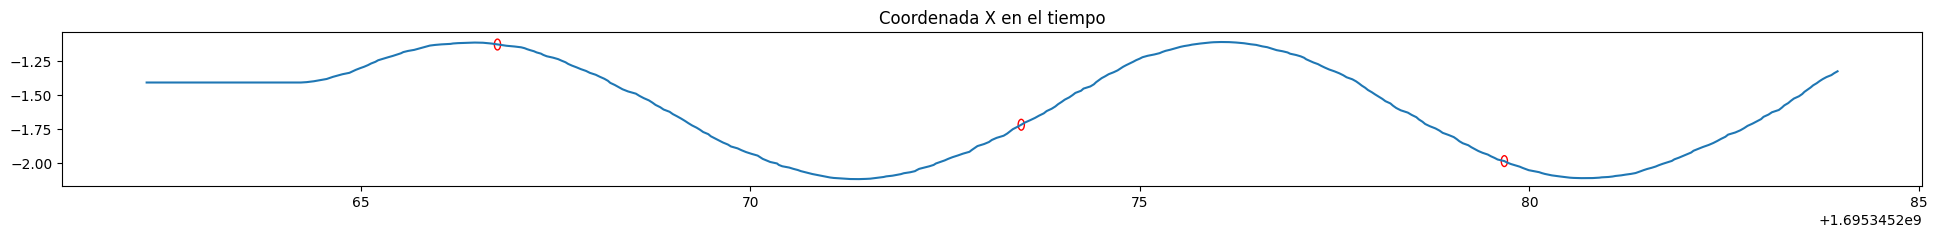

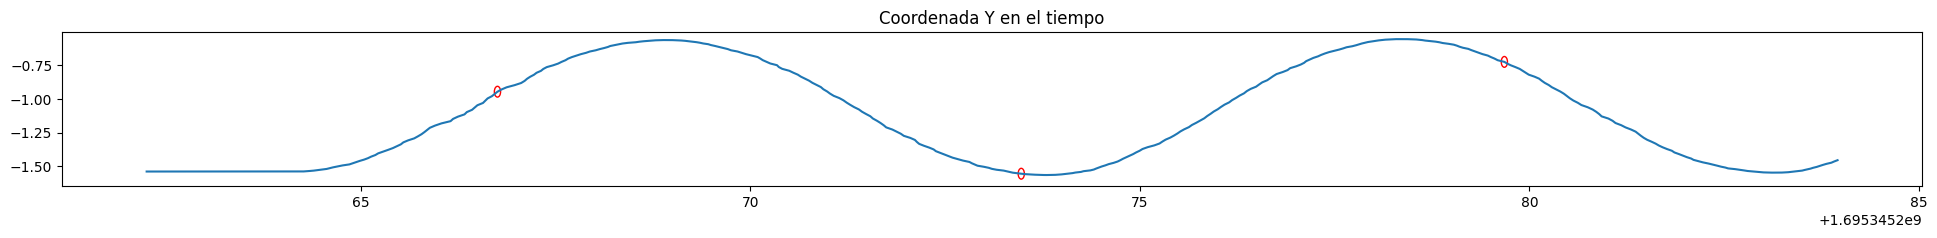

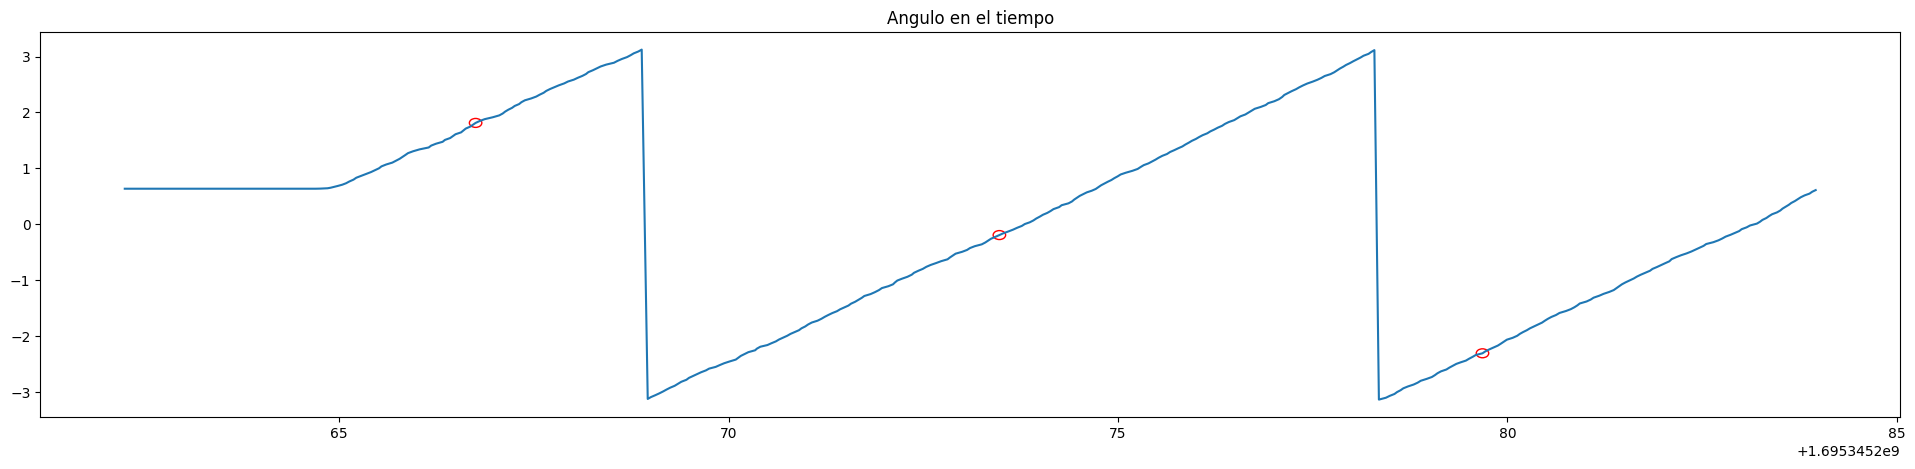

In [14]:
for i, log in enumerate(["circulos/circularLinNegAngNeg.txt", "circulos/circularLinNegAngPos.txt", "circulos/circularLinPosAngNeg.txt", "circulos/circularLinPosAngPos.txt"]):
    data = pd.read_csv(log, sep="\t", header=None, names=["timestamp", "x", "y", "theta", "v", "w"])
    
    data["nanosecs"] = data.apply(lambda row: re.match("(?:builtin_interfaces\.msg\.Time\(sec=\d+, nanosec=)(\d+)(?:\))", row.timestamp).group(1), axis=1)
    data["secs"] = data.apply(lambda row: re.match("(?:builtin_interfaces\.msg\.Time\(sec=)(\d+)(?:, nanosec=\d+\))", row.timestamp).group(1), axis=1)
    
    data["g_timestamp"] = data.apply(lambda row: np.float64(row.secs) + np.float64(row.nanosecs) * 10e-10, axis=1)
    
    selectedRow0 = data.iloc[len(data)//5]
    selectedRow1 = data.iloc[len(data)//2]
    selectedRow2 = data.iloc[len(data)//5*4]
    
    plt.rcParams["figure.figsize"] = (20,20)
    
    plt.quiver(data.x, data.y, np.cos(data.theta), np.sin(data.theta), color='r', units='xy', scale=100, linewidths=0.1)
    plt.quiver(data.x, data.y, -np.sin(data.theta), np.cos(data.theta), color='g', units='xy', scale=100, linewidths=0.1)
    
    plt.gca().add_patch(plt.Circle((selectedRow0.x, selectedRow0.y), 0.007, color='b', fill=False))
    plt.gca().add_patch(plt.Circle((selectedRow1.x, selectedRow1.y), 0.007, color='b', fill=False))
    plt.gca().add_patch(plt.Circle((selectedRow2.x, selectedRow2.y), 0.007, color='b', fill=False))
    
    plt.title("Pose del robot")
    plt.savefig(f"c{i}1", dpi=300)
    plt.show()
    
    plt.rcParams["figure.figsize"] = (6.4, 4.8)
    
    plt.rcParams["figure.figsize"] = (24, 2)
    
    plt.plot(data.g_timestamp, data.x)
    plt.gca().add_patch(plt.Circle((selectedRow0.g_timestamp, selectedRow0.x), 0.04, color='r', fill=False))
    plt.gca().add_patch(plt.Circle((selectedRow1.g_timestamp, selectedRow1.x), 0.04, color='r', fill=False))
    plt.gca().add_patch(plt.Circle((selectedRow2.g_timestamp, selectedRow2.x), 0.04, color='r', fill=False))
    plt.title("Coordenada X en el tiempo")
    plt.savefig(f"c{i}2", dpi=300)
    plt.show()
    
    plt.plot(data.g_timestamp, data.y)
    plt.gca().add_patch(plt.Circle((selectedRow0.g_timestamp, selectedRow0.y), 0.04, color='r', fill=False))
    plt.gca().add_patch(plt.Circle((selectedRow1.g_timestamp, selectedRow1.y), 0.04, color='r', fill=False))
    plt.gca().add_patch(plt.Circle((selectedRow2.g_timestamp, selectedRow2.y), 0.04, color='r', fill=False))
    plt.title("Coordenada Y en el tiempo")
    plt.savefig(f"c{i}3", dpi=300)
    plt.show()
    
    plt.rcParams["figure.figsize"] = (24, 5)
    
    plt.plot(data.g_timestamp, data.theta)
    plt.gca().add_patch(plt.Circle((selectedRow0.g_timestamp, selectedRow0.theta), 0.08, color='r', fill=False))
    plt.gca().add_patch(plt.Circle((selectedRow1.g_timestamp, selectedRow1.theta), 0.08, color='r', fill=False))
    plt.gca().add_patch(plt.Circle((selectedRow2.g_timestamp, selectedRow2.theta), 0.08, color='r', fill=False))
    plt.title("Angulo en el tiempo")
    plt.savefig(f"c{i}4", dpi=300)
    plt.show()
    
    plt.rcParams["figure.figsize"] = (6.4, 4.8)